In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolov8-segmentation/README.dataset.txt
/kaggle/input/yolov8-segmentation/README.roboflow.txt
/kaggle/input/yolov8-segmentation/data.yaml
/kaggle/input/yolov8-segmentation/valid/labels/Te-pi_0162_jpg.rf.9cb448e1f29c3f1d0374706494a03110.txt
/kaggle/input/yolov8-segmentation/valid/labels/Te-gl_0167_jpg.rf.45fd2b60f10accc4f067235d70dc77cc.txt
/kaggle/input/yolov8-segmentation/valid/labels/DICOM-Frame-208_jpg.rf.210adb8dda0b149f435e8c709856d942.txt
/kaggle/input/yolov8-segmentation/valid/labels/Tr-pi_0897_jpg.rf.7c3bbd5463a3af9ed9983f3a69995587.txt
/kaggle/input/yolov8-segmentation/valid/labels/Tr-gl_0239_jpg.rf.ea18c6e82ce8965b833d55bf4c786d8d.txt
/kaggle/input/yolov8-segmentation/valid/labels/m3-82-_jpg.rf.b769dbf18a97fbd82058a670525e9fe3.txt
/kaggle/input/yolov8-segmentation/valid/labels/Tr-gl_0918_jpg.rf.f8fc334dba5f8bffd8b9565ce0d51fb5.txt
/kaggle/input/yolov8-segmentation/valid/labels/gg-353-_jpg.rf.63bce7a608cdbc41f161b0e54b21f2e9.txt
/kaggle/input/yolov8-segmentation/v

In [2]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [3]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')
T_Model = YOLO('yolov8s-seg.pt')

In [8]:
from ultralytics import YOLO

# Load YOLOv8 segmentation model
model = YOLO("yolov8s-seg.pt")

# Train the model
results = model.train(
    data="/kaggle/input/yolov8-segmentation/data.yaml",
    epochs=50,
    imgsz=768,           
    batch=16,
    patience=20,
    optimizer='auto',
    name="brain_seg_yolov8"
)


Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/yolov8-segmentation/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=brain_seg_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plot

[INFO] Copied 18 images into /kaggle/working/data/test_images
[CMD] yolo segment predict model=/kaggle/working/runs/segment/brain_seg_yolov8/weights/best.pt source=/kaggle/working/data/test_images save=True name=predict_from_script
Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 39.9 GFLOPs

image 1/12 /kaggle/working/data/test_images/train_batch0.jpg: 768x768 1 giloma, 3 meingiomas, 26.4ms
image 2/12 /kaggle/working/data/test_images/train_batch1.jpg: 768x768 (no detections), 26.5ms
image 3/12 /kaggle/working/data/test_images/train_batch2.jpg: 768x768 1 meingioma, 26.4ms
image 4/12 /kaggle/working/data/test_images/train_batch9360.jpg: 768x768 1 giloma, 2 meingiomas, 26.4ms
image 5/12 /kaggle/working/data/test_images/train_batch9361.jpg: 768x768 2 gilomas, 5 meingiomas, 26.4ms
image 6/12 /kaggle/working/data/test_images/train_batch9362.jpg: 768x768 1 giloma, 6 meingiomas, 26.4m

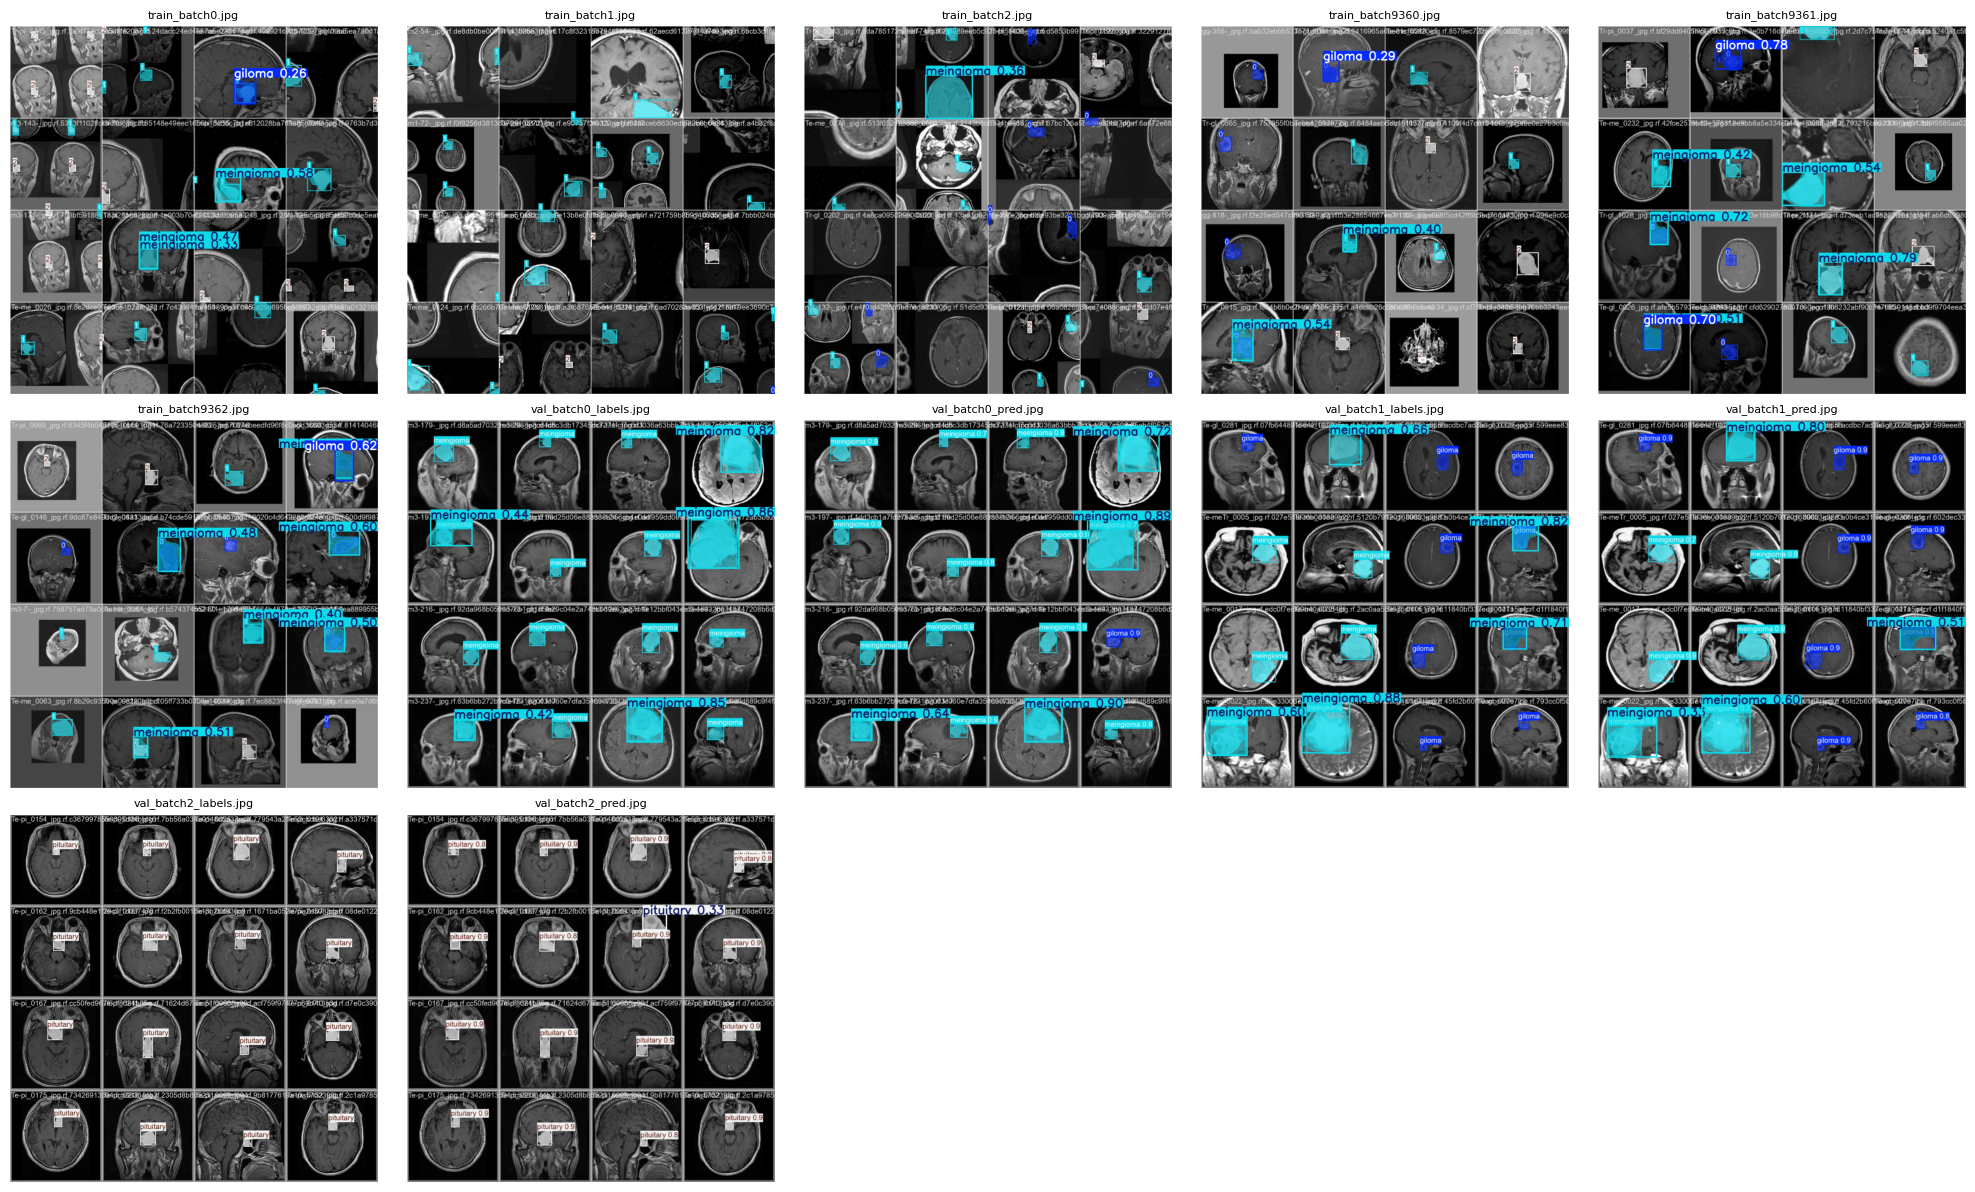

In [13]:
# ✅ Kaggle/Colab: create test set -> run YOLOv8 predict -> show 20 images

import os, shutil, subprocess
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

WORK = Path("/kaggle/working")  # Colab হলে Path(".") দিন
RUN_DIR = WORK / "runs/segment/brain_seg_yolov8"
WEIGHTS = RUN_DIR / "weights/best.pt"
TEST_DIR = WORK / "data/test_images"
PRED_NAME = "predict_from_script"  # output subfolder name

# 1) নিশ্চিত করুন test_images আছে; না থাকলে train/val batch jpg থেকে কপি করুন
TEST_DIR.mkdir(parents=True, exist_ok=True)
existing = list(TEST_DIR.glob("*.jpg")) + list(TEST_DIR.glob("*.png"))

if not existing:
    src_patterns = ["train_batch*.jpg", "val_batch*.jpg", "*_pred.jpg", "*_labels.jpg"]
    copied = 0
    for pat in src_patterns:
        for p in sorted(RUN_DIR.glob(pat)):
            shutil.copy(p, TEST_DIR / p.name)
            copied += 1
            if copied >= 50:  # যথেষ্ট
                break
        if copied >= 50:
            break
    print(f"[INFO] Copied {copied} images into {TEST_DIR}")
else:
    print(f"[INFO] Found {len(existing)} existing images in {TEST_DIR}")

# 2) YOLOv8 predict চালান
assert WEIGHTS.exists(), f"weights not found: {WEIGHTS}"
assert any(TEST_DIR.glob("*.*")), f"no images found in {TEST_DIR}"

cmd = [
    "yolo", "segment", "predict",
    f"model={WEIGHTS}",
    f"source={TEST_DIR}",
    "save=True",
    f"name={PRED_NAME}",
]
print("[CMD]", " ".join(cmd))
subprocess.run(cmd, check=True)

# 3) ভিজুয়ালাইজেশন (২০টা ইমেজ পর্যন্ত)
pred_dir = WORK / "runs/segment" / PRED_NAME
if not pred_dir.exists():
    # fallback: ডিফল্ট predict ফোল্ডার
    pred_dir = WORK / "runs/segment/predict"
assert pred_dir.exists(), f"prediction folder not found: {pred_dir}"

image_files = sorted(list(pred_dir.glob("*.jpg")) + list(pred_dir.glob("*.png")))[:20]
print(f"[INFO] Showing {len(image_files)} images from {pred_dir}")

cols = 5
rows = (len(image_files) + cols - 1) // cols
plt.figure(figsize=(4*cols, 4*rows))
for i, img_path in enumerate(image_files, start=1):
    img = mpimg.imread(str(img_path))
    plt.subplot(rows, cols, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_path.name, fontsize=8)
plt.tight_layout()
plt.show()


In [15]:
!yolo segment predict \
    model=runs/segment/brain_seg_yolov8/weights/best.pt \
    source=/kaggle/working/data/test_images \
    save=True


Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 39.9 GFLOPs

image 1/12 /kaggle/working/data/test_images/train_batch0.jpg: 768x768 1 giloma, 3 meingiomas, 26.4ms
image 2/12 /kaggle/working/data/test_images/train_batch1.jpg: 768x768 (no detections), 26.4ms
image 3/12 /kaggle/working/data/test_images/train_batch2.jpg: 768x768 1 meingioma, 26.4ms
image 4/12 /kaggle/working/data/test_images/train_batch9360.jpg: 768x768 1 giloma, 2 meingiomas, 26.4ms
image 5/12 /kaggle/working/data/test_images/train_batch9361.jpg: 768x768 2 gilomas, 5 meingiomas, 26.5ms
image 6/12 /kaggle/working/data/test_images/train_batch9362.jpg: 768x768 1 giloma, 6 meingiomas, 26.4ms
image 7/12 /kaggle/working/data/test_images/val_batch0_labels.jpg: 768x768 5 meingiomas, 26.5ms
image 8/12 /kaggle/working/data/test_images/val_batch0_pred.jpg: 768x768 4 meingiomas, 26.4ms
image 9/12 /kaggle/working/data/test_ima

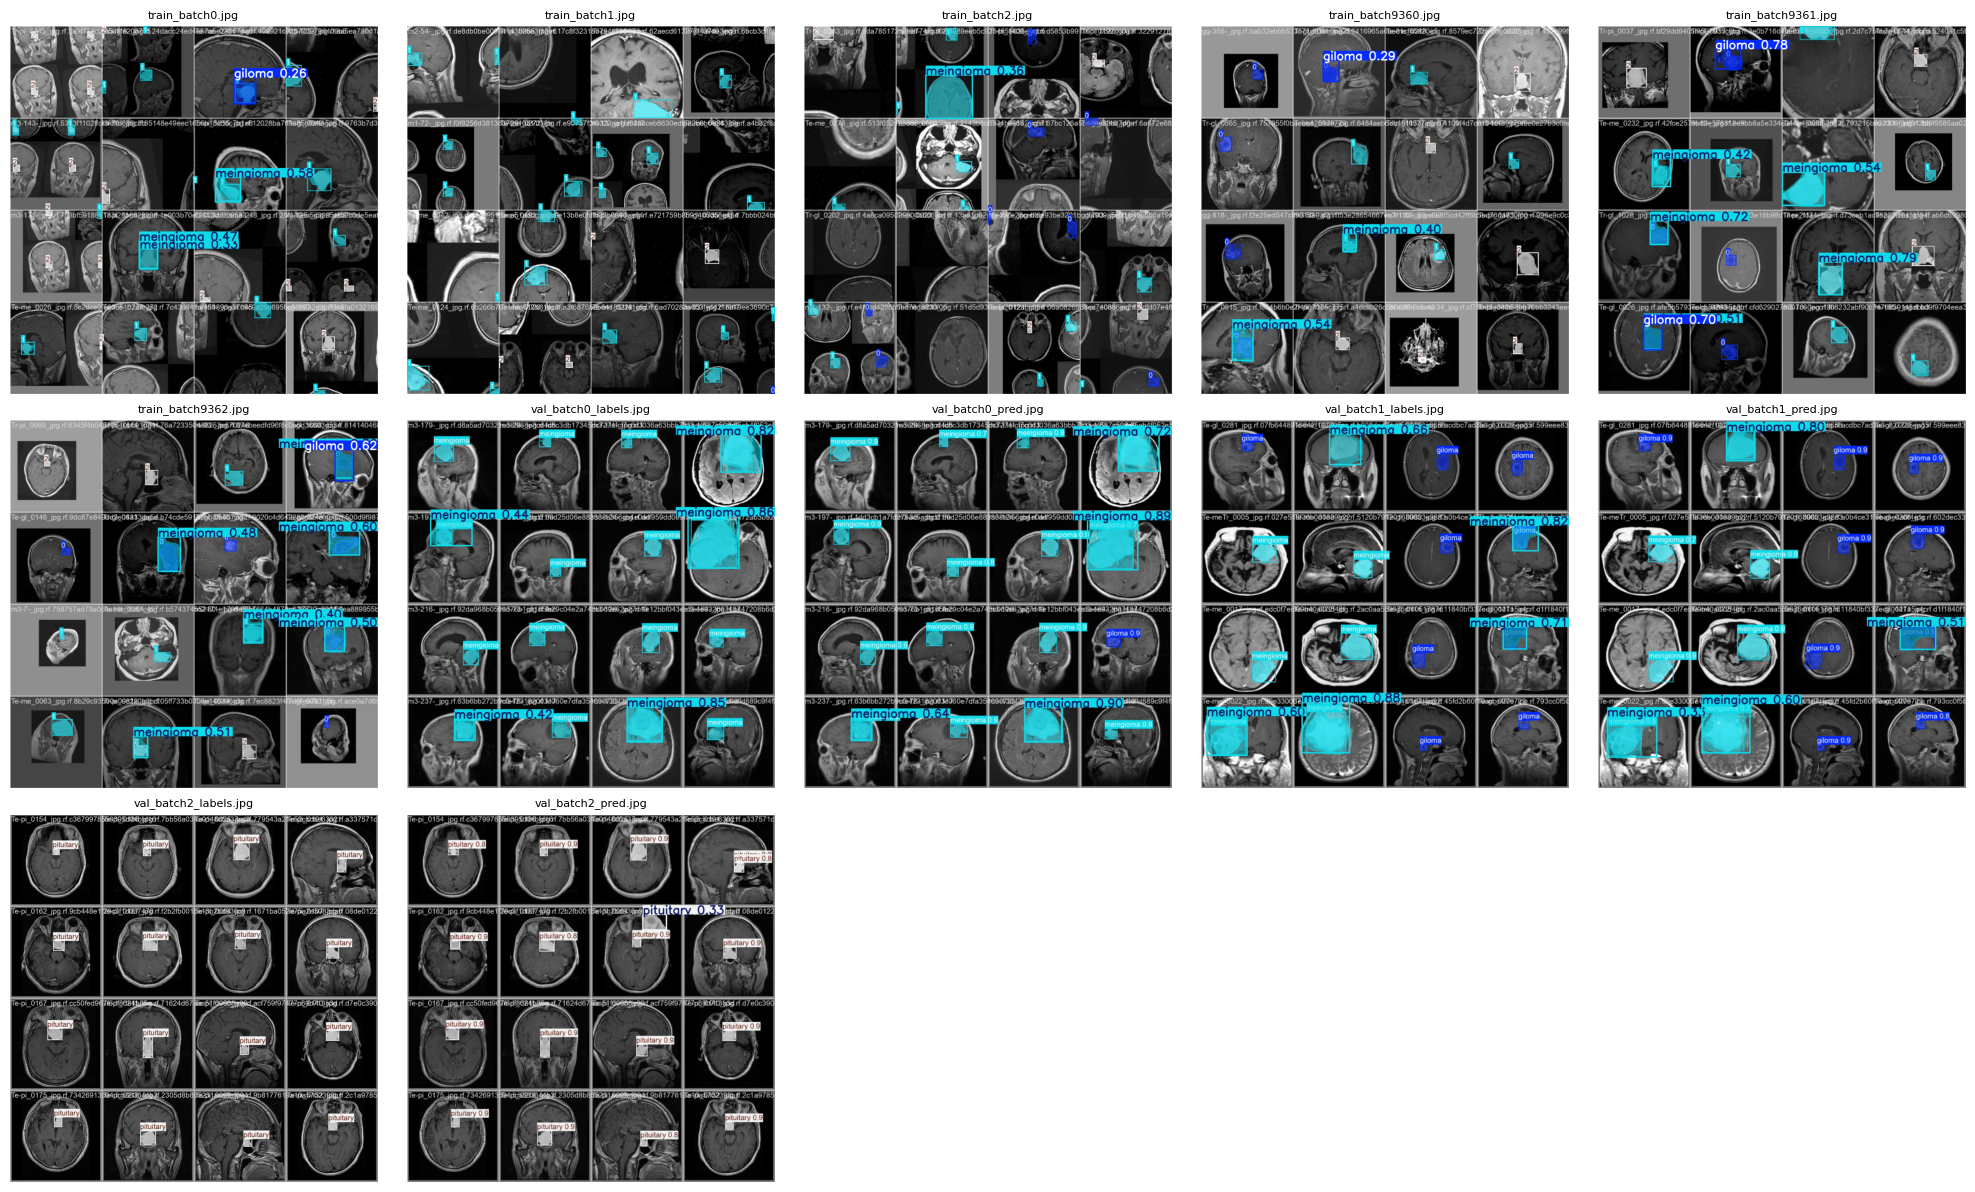

In [16]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pred_dir = Path("/kaggle/working/runs/segment/predict")
image_files = sorted(list(pred_dir.glob("*.jpg")) + list(pred_dir.glob("*.png")))[:20]

cols, rows = 5, (len(image_files)+4)//5
plt.figure(figsize=(4*cols, 4*rows))
for i, img_path in enumerate(image_files, 1):
    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_path.name, fontsize=8)
plt.tight_layout()
plt.show()


In [17]:
import os, shutil
from pathlib import Path

work = Path("/kaggle/working")
test_dir = work / "data/test_images"
test_dir.mkdir(parents=True, exist_ok=True)

# যদি কোনো ছবি না থাকে তবে val_batch ফাইল থেকে কপি করি
src_dir = work / "runs/segment/brain_seg_yolov8"
copied = 0
for f in src_dir.glob("val_batch*.jpg"):
    shutil.copy(f, test_dir / f.name)
    copied += 1
print(f"Copied {copied} images into {test_dir}")


Copied 6 images into /kaggle/working/data/test_images


In [18]:
!yolo segment predict \
    model=/kaggle/working/runs/segment/brain_seg_yolov8/weights/best.pt \
    source=/kaggle/working/data/test_images \
    save=True


Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 39.9 GFLOPs

image 1/12 /kaggle/working/data/test_images/train_batch0.jpg: 768x768 1 giloma, 3 meingiomas, 26.4ms
image 2/12 /kaggle/working/data/test_images/train_batch1.jpg: 768x768 (no detections), 26.4ms
image 3/12 /kaggle/working/data/test_images/train_batch2.jpg: 768x768 1 meingioma, 26.4ms
image 4/12 /kaggle/working/data/test_images/train_batch9360.jpg: 768x768 1 giloma, 2 meingiomas, 26.4ms
image 5/12 /kaggle/working/data/test_images/train_batch9361.jpg: 768x768 2 gilomas, 5 meingiomas, 26.4ms
image 6/12 /kaggle/working/data/test_images/train_batch9362.jpg: 768x768 1 giloma, 6 meingiomas, 26.4ms
image 7/12 /kaggle/working/data/test_images/val_batch0_labels.jpg: 768x768 5 meingiomas, 26.4ms
image 8/12 /kaggle/working/data/test_images/val_batch0_pred.jpg: 768x768 4 meingiomas, 26.4ms
image 9/12 /kaggle/working/data/test_ima

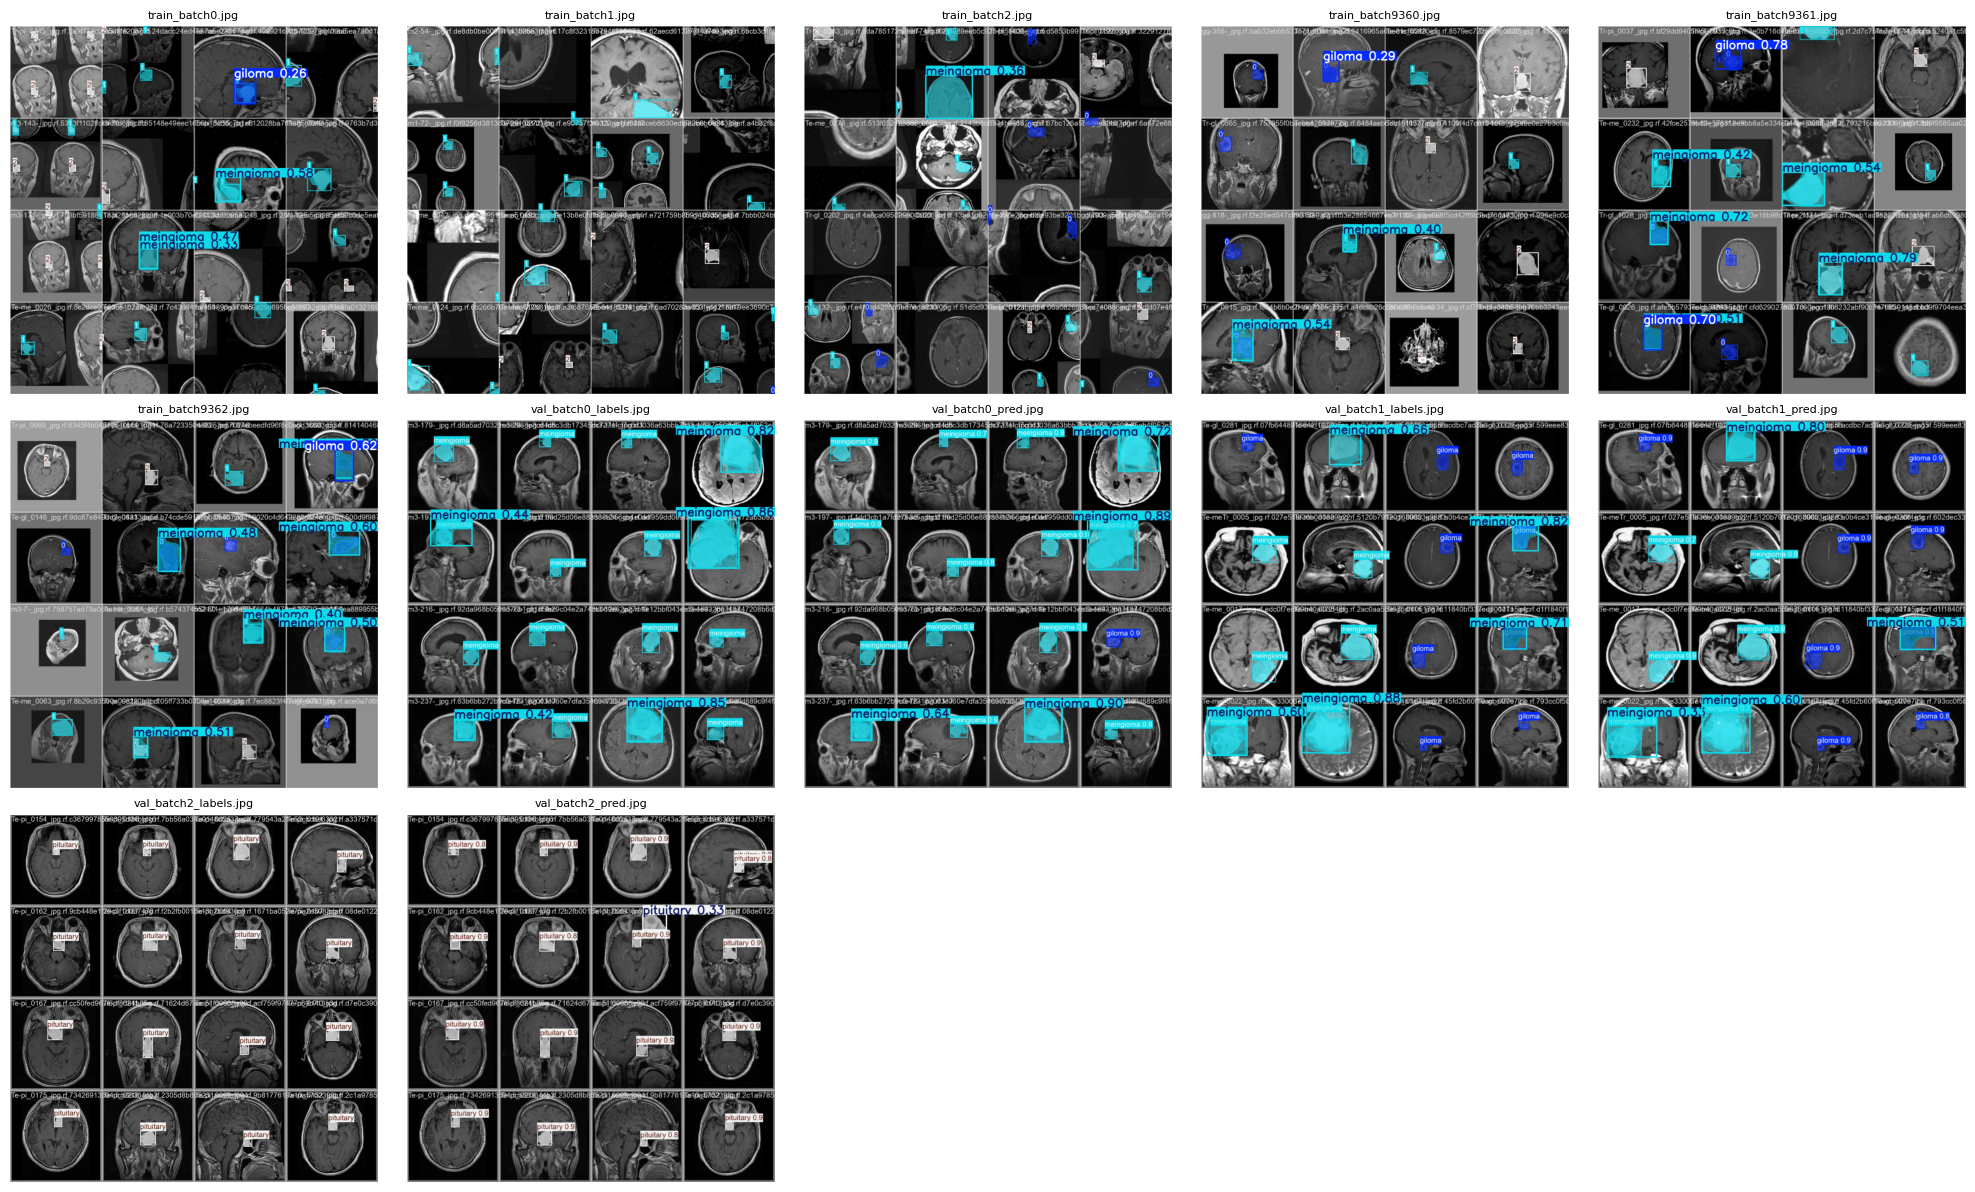

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pred_dir = Path("/kaggle/working/runs/segment/predict")
image_files = sorted(list(pred_dir.glob("*.jpg")) + list(pred_dir.glob("*.png")))[:20]

cols, rows = 5, (len(image_files)+4)//5
plt.figure(figsize=(4*cols, 4*rows))
for i, img_path in enumerate(image_files, 1):
    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_path.name, fontsize=8)
plt.tight_layout()
plt.show()


In [20]:
!mkdir -p /kaggle/working/test_images


In [21]:
!yolo segment predict \
    model=/kaggle/working/runs/segment/brain_seg_yolov8/weights/best.pt \
    source=/kaggle/input/brain-mri-dataset/test \
    save=True


Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 39.9 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 986, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 555, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 247, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packag

In [1]:
import re
import pandas as pd

# === আপনার validation লগটা এখানে পেস্ট করুন ===
log_text = r"""
Validating runs/segment/brain_seg_yolov8/weights/best.pt...
Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 39.9 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 12/12 1.9it/s 6.4s
                   all        355        350      0.943      0.941      0.958      0.725      0.939      0.938      0.952      0.737
                giloma        108        108      0.927      0.939      0.962      0.727      0.918       0.93      0.952      0.732
             meingioma        108        108      0.951      0.944      0.947      0.684      0.942      0.935      0.933      0.691
             pituitary        134        134       0.95       0.94      0.965      0.764      0.957      0.948       0.97      0.788
Speed: 0.3ms preprocess, 8.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/segment/brain_seg_yolov8
"""

# === পার্সার: Box ও Mask—দুটো ব্লকের মান টানবে ===
rows, capture = [], False
row_re = re.compile(
    r"^\s*(\S+)\s+(\d+)\s+(\d+)\s+"           # Class, Images, Instances
    r"([0-9.eE+-]+)\s+([0-9.eE+-]+)\s+([0-9.eE+-]+)\s+([0-9.eE+-]+)\s+"  # Box(P,R,mAP50,mAP50-95)
    r"([0-9.eE+-]+)\s+([0-9.eE+-]+)\s+([0-9.eE+-]+)\s+([0-9.eE+-]+)\s*$" # Mask(P,R,mAP50,mAP50-95)
)

for line in log_text.splitlines():
    if not capture and ("Class" in line and "Mask(" in line):
        capture = True
        continue
    if capture:
        s = line.strip()
        if not s or s.startswith("Speed") or s.startswith("Results saved") or s.startswith("Validating"):
            capture = False
            continue
        m = row_re.match(line)
        if m:
            cls, images, inst, bp, br, b50, b5095, mp, mr, m50, m5095 = m.groups()
            rows.append({
                "Class": cls,
                "Images": int(images),
                "Instances": int(inst),
                "Box(P)": float(bp),
                "Box(R)": float(br),
                "Box mAP50": float(b50),
                "Box mAP50-95": float(b5095),
                "Mask(P)": float(mp),
                "Mask(R)": float(mr),
                "Mask mAP50": float(m50),
                "Mask mAP50-95": float(m5095),
            })

# DataFrame
df = pd.DataFrame(
    rows,
    columns=["Class","Images","Instances","Box(P)","Box(R)","Box mAP50","Box mAP50-95",
             "Mask(P)","Mask(R)","Mask mAP50","Mask mAP50-95"]
)

# সেভ (Kaggle থেকে ডাউনলোডযোগ্য)
csv_path  = "/kaggle/working/seg_val_metrics_table.csv"
xlsx_path = "/kaggle/working/seg_val_metrics_table.xlsx"
df.to_csv(csv_path, index=False)
df.to_excel(xlsx_path, index=False)

# নোটবুকে দেখা
df


Class  Images  Instances  Box(P)  Box(R)  Box mAP50  Box mAP50-95  \
0        all     355        350   0.943   0.941      0.958         0.725   
1     giloma     108        108   0.927   0.939      0.962         0.727   
2  meingioma     108        108   0.951   0.944      0.947         0.684   
3  pituitary     134        134   0.950   0.940      0.965         0.764   

   Mask(P)  Mask(R)  Mask mAP50  Mask mAP50-95  
0    0.939    0.938       0.952          0.737  
1    0.918    0.930       0.952          0.732  
2    0.942    0.935       0.933          0.691  
3    0.957    0.948       0.970          0.788

In [3]:
# ---- Install Ultralytics (if missing) + OpenCV ----
import sys, importlib, subprocess

def ensure(pkg):
    mod = pkg.split("==")[0].split("[")[0].replace("-", "_")
    try:
        importlib.import_module(mod if mod != "opencv_python_headless" else "cv2")
    except Exception:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])

ensure("ultralytics==8.3.189")           # same version as your logs
ensure("opencv-python-headless")         # for cv2 without GUI

from ultralytics import YOLO
import cv2
print("✅ Ready:", YOLO.__name__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyti